# <a id='toc1_'></a>[$$ Day-6-Assignment $$](#toc0_)

---


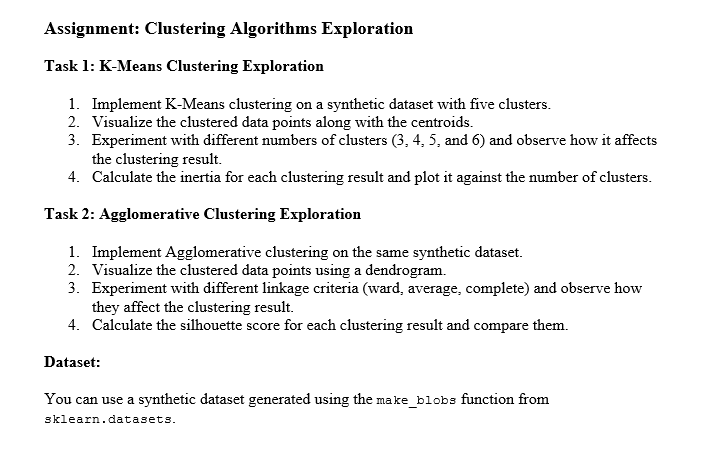

---

**Table of contents**<a id='toc0_'></a>    
- [$$ Day-6-Assignment $$](#toc1_)    
  - [Required Libraries](#toc1_1_)    
  - [Setting random Seed](#toc1_2_)    
  - [Generating a synthetic dataset](#toc1_3_)    
  - [Task 1: K-Means Clustering Exploration](#toc1_4_)    
    - [Define the KMeans model with 5 clusters](#toc1_4_1_)    
      - [Get the cluster labels and centroids](#toc1_4_1_1_)    
    - [Visualize the clustered data points along with the centroids](#toc1_4_2_)    
    - [Experiment with different numbers of clusters (3, 4, 5, and 6) and observe how it affects the clustering result](#toc1_4_3_)    
    - [Calculate the inertia for each clustering result and plot it against the number of clusters](#toc1_4_4_)    
      - [Conclusion](#toc1_4_4_1_)    
  - [Task 2: Agglomerative Clustering Exploration](#toc1_5_)    
    - [Define the Agglomerative Clustering model with 5 clusters](#toc1_5_1_)    
    - [Visualize the clustered data points using a dendrogram](#toc1_5_2_)    
    - [Experiment with different linkage criteria (ward, average, complete) and observe how they affect the clustering result](#toc1_5_3_)    
      - [Initialize dictionary to store silhouette scores](#toc1_5_3_1_)    
      - [Define linkage criteria](#toc1_5_3_2_)    
      - [Perform Agglomerative Clustering with different linkage criteria](#toc1_5_3_3_)    
        - [Insights](#toc1_5_3_3_1_)    
    - [Calculate the silhouette score for each clustering result and compare them](#toc1_5_4_)    
    - [Conclusion](#toc1_5_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---


## <a id='toc1_1_'></a>[Required Libraries](#toc0_)

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

---

## <a id='toc1_2_'></a>[Setting random Seed](#toc0_)

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

---

## <a id='toc1_3_'></a>[Generating a synthetic dataset](#toc0_)

In [3]:

# Generate a synthetic dataset with 5 clusters
X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

---

## <a id='toc1_4_'></a>[Task 1: K-Means Clustering Exploration](#toc0_)

...........................................................................................................................................................................................................................................................................................................................................................................................


### <a id='toc1_4_1_'></a>[Define the KMeans model with 5 clusters](#toc0_)

In [4]:
# Define the KMeans model with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
kmeans_5.fit(X)

KMeans(n_clusters=5, random_state=42)

...........................................................................................................................................................................................................................................................................................................................................................................................

#### <a id='toc1_4_1_1_'></a>[Get the cluster labels and centroids](#toc0_)

In [5]:

# Get the cluster labels and centroids
labels_5 = kmeans_5.labels_
centroids_5 = kmeans_5.cluster_centers_

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_4_2_'></a>[Visualize the clustered data points along with the centroids](#toc0_)


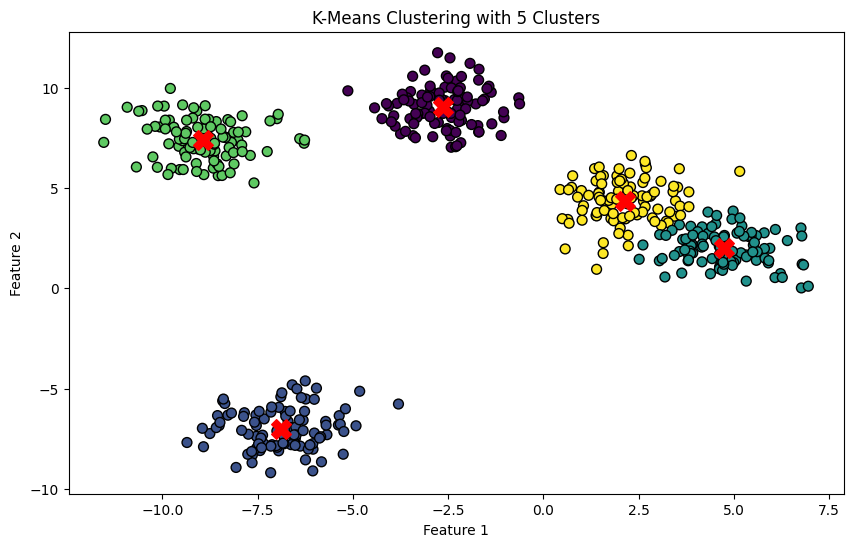

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_5, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids_5[:, 0], centroids_5[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering with 5 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_4_3_'></a>[Experiment with different numbers of clusters (3, 4, 5, and 6) and observe how it affects the clustering result](#toc0_)


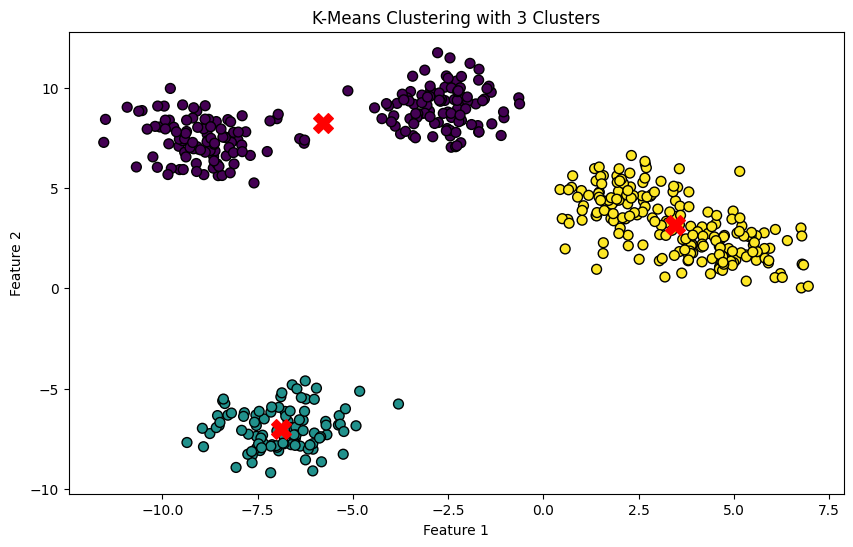

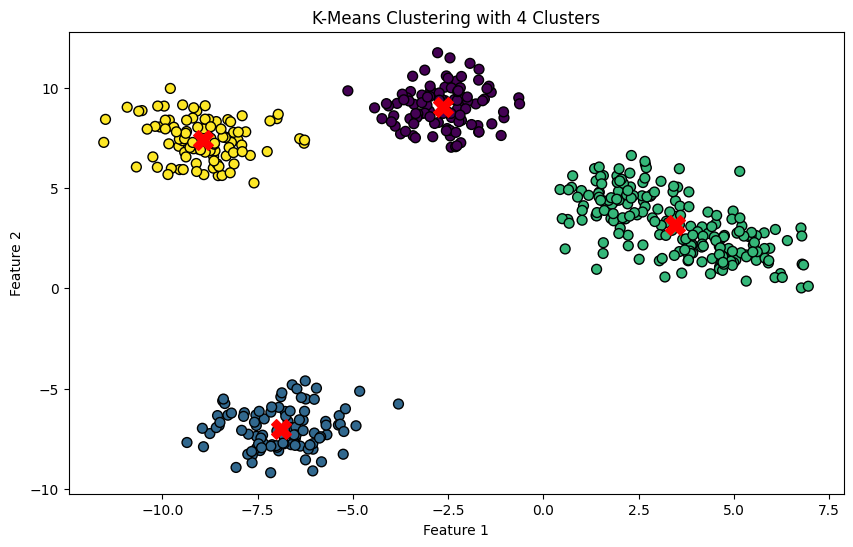

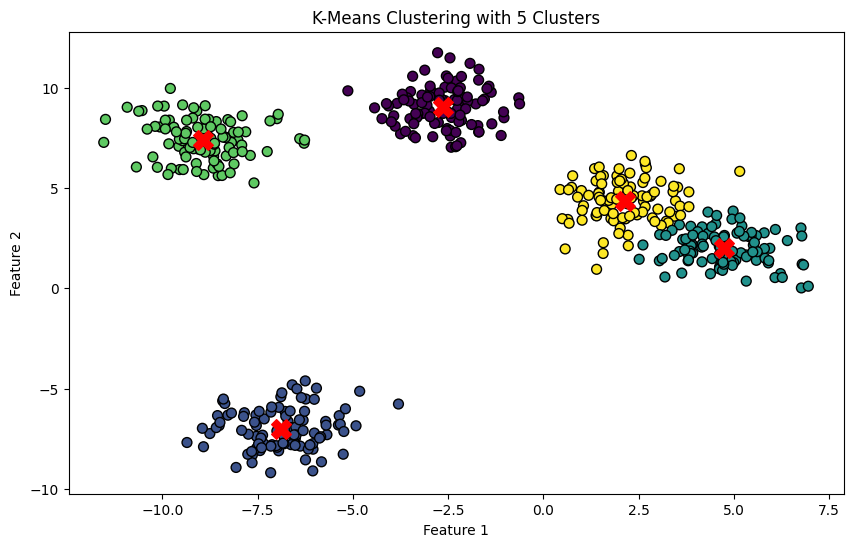

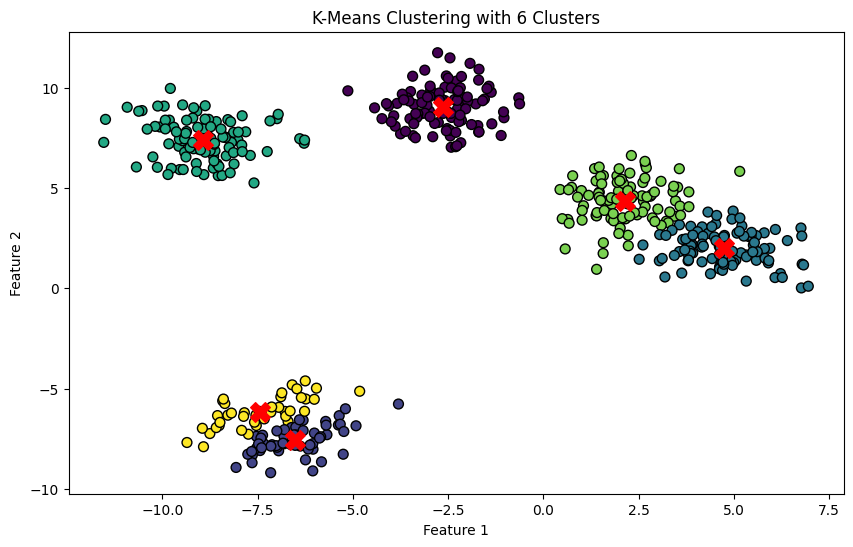

In [7]:
# Initialize lists to store inertia values and KMeans models
inertia_values = []
kmeans_models = []

# Test with different numbers of clusters
for k in [3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)
    kmeans_models.append(kmeans)
    
    # Plot the clustering result
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title(f"K-Means Clustering with {k} Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_4_4_'></a>[Calculate the inertia for each clustering result and plot it against the number of clusters](#toc0_)


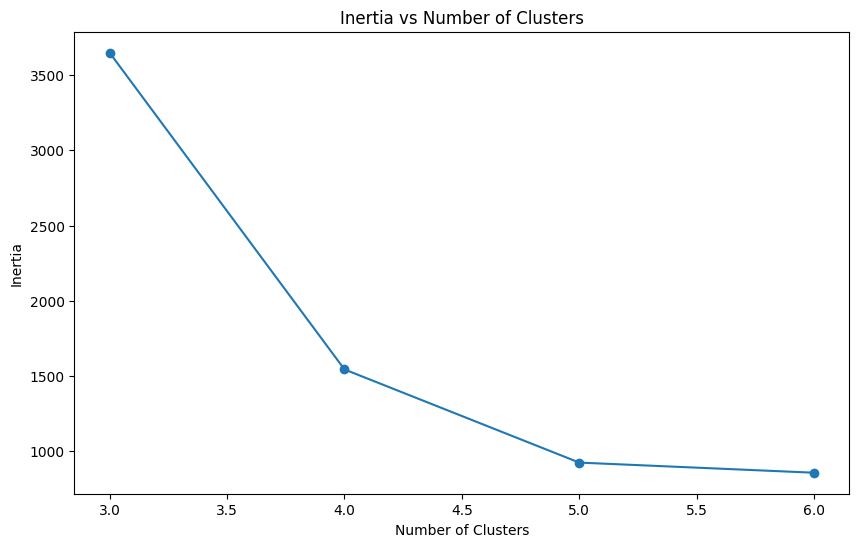

In [8]:
# Plot inertia values against the number of clusters
plt.figure(figsize=(10, 6))
plt.plot([3, 4, 5, 6], inertia_values, marker='o')
plt.title("Inertia vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


#### <a id='toc1_4_4_1_'></a>[Conclusion](#toc0_)

- The plot shows a clear "elbow" at 4 clusters.
- Suggesting that 4 is a good choice for the number of clusters. This is because adding more clusters beyond 4 does not significantly reduce the inertia

----

## <a id='toc1_5_'></a>[Task 2: Agglomerative Clustering Exploration](#toc0_)


---

### <a id='toc1_5_1_'></a>[Define the Agglomerative Clustering model with 5 clusters](#toc0_)


In [9]:
# Define the Agglomerative Clustering model with 5 clusters
agg_clustering_5 = AgglomerativeClustering(n_clusters=5)
agg_labels_5 = agg_clustering_5.fit_predict(X)


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_2_'></a>[Visualize the clustered data points using a dendrogram](#toc0_)

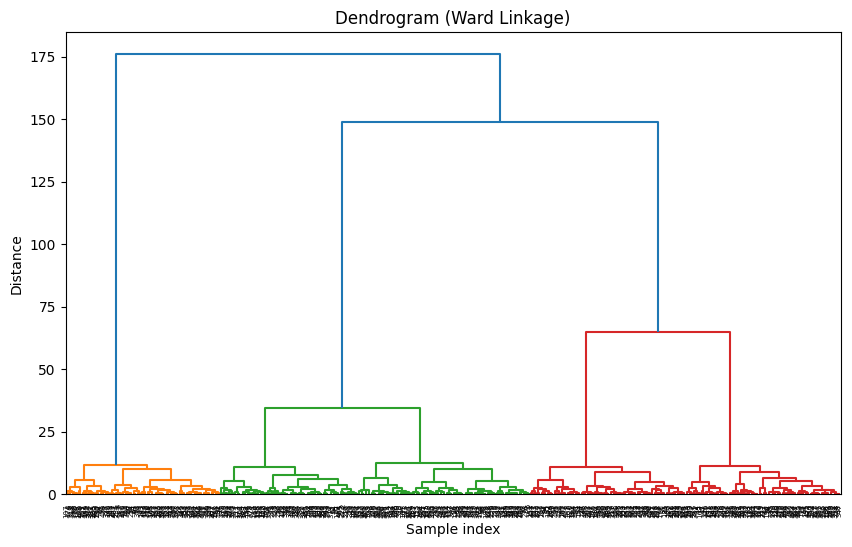

In [10]:
# Generate the linkage matrix
Z = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_3_'></a>[Experiment with different linkage criteria (ward, average, complete) and observe how they affect the clustering result](#toc0_)


---

#### <a id='toc1_5_3_1_'></a>[Initialize dictionary to store silhouette scores](#toc0_)

In [11]:
silhouette_scores = {}


...........................................................................................................................................................................................................................................................................................................................................................................................

#### <a id='toc1_5_3_2_'></a>[Define linkage criteria](#toc0_)

In [12]:

linkage_criteria = ['ward', 'average', 'complete']

...........................................................................................................................................................................................................................................................................................................................................................................................

#### <a id='toc1_5_3_3_'></a>[Perform Agglomerative Clustering with different linkage criteria](#toc0_)

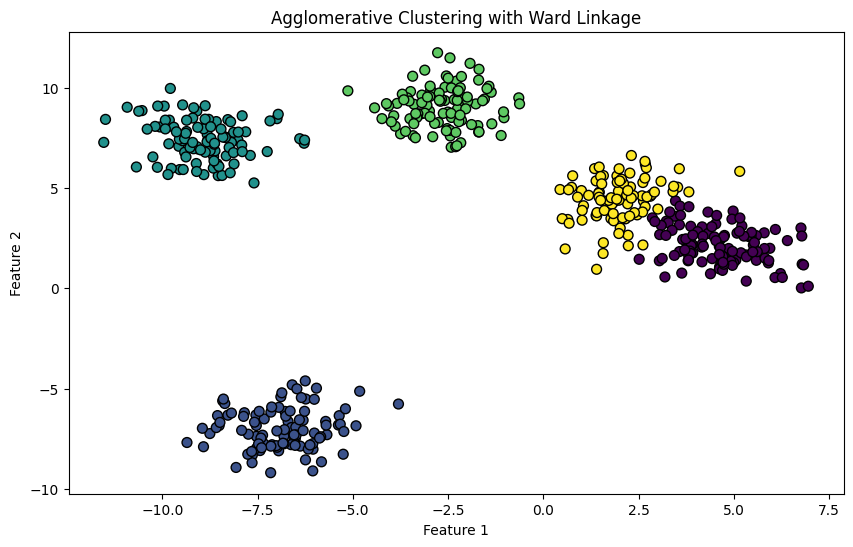

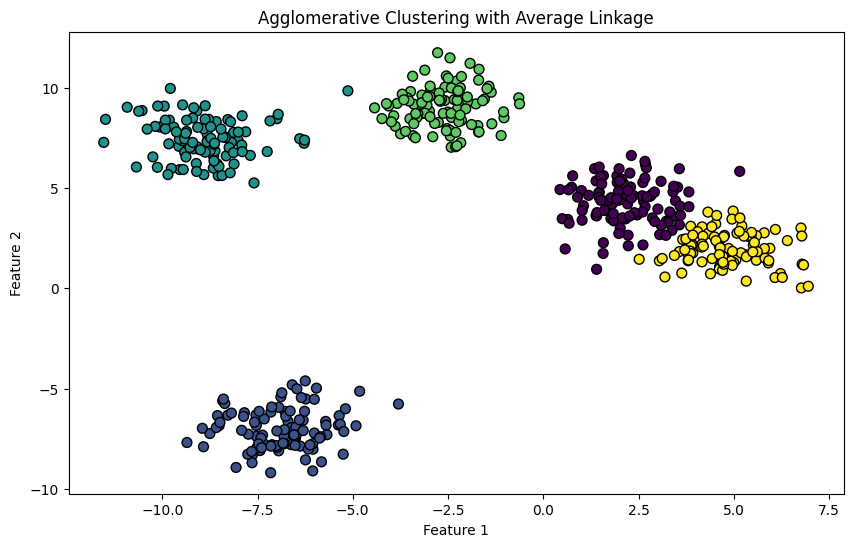

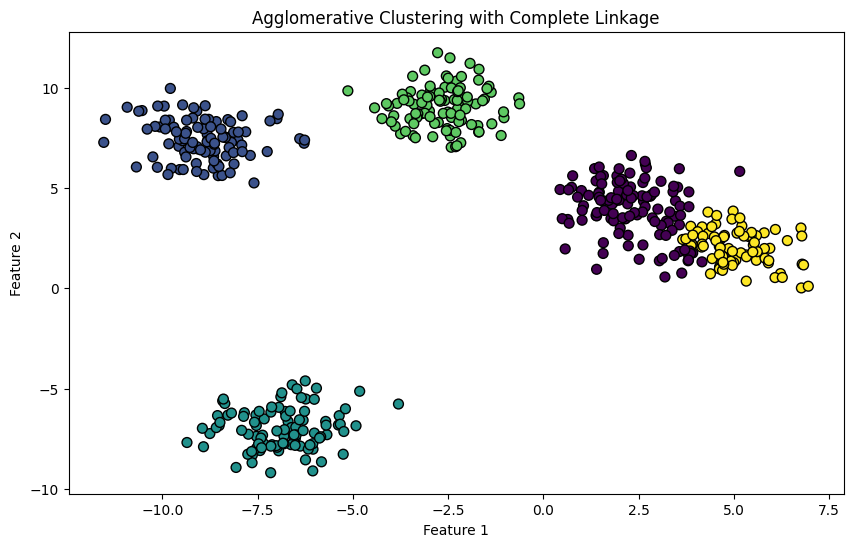

In [13]:
for criterion in linkage_criteria:
    agg_clustering = AgglomerativeClustering(n_clusters=5, linkage=criterion)
    agg_labels = agg_clustering.fit_predict(X)
    
    # Calculate silhouette score
    silhouette = silhouette_score(X, agg_labels)
    silhouette_scores[criterion] = silhouette
    
    # Plot the clustering result
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(f"Agglomerative Clustering with {criterion.capitalize()} Linkage")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

...........................................................................................................................................................................................................................................................................................................................................................................................

##### <a id='toc1_5_3_3_1_'></a>[Insights](#toc0_)
- **Ward Linkage**: Clusters are compact and distinct.
- **Average Linkage**: Clusters are well separated and balanced.
- **Complete Linkage**: Clusters are dispersed.

...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_4_'></a>[Calculate the silhouette score for each clustering result and compare them](#toc0_)


In [14]:
# Print silhouette scores
for criterion, score in silhouette_scores.items():
    print(f"Silhouette Score for {criterion.capitalize()} Linkage: {score:.4f}")

Silhouette Score for Ward Linkage: 0.6689
Silhouette Score for Average Linkage: 0.6753
Silhouette Score for Complete Linkage: 0.6442


...........................................................................................................................................................................................................................................................................................................................................................................................

### <a id='toc1_5_5_'></a>[Conclusion](#toc0_)

- Highest silhouette score for Average linkage
- Means, it forms the ***better seperated clusters***.
- So the best choice for this dataset is **"Average Linkage"**

---